# Easy Credit Score Classification Dataset for Multiple Classification.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data=pd.read_csv("Credit Score Classification Dataset.csv")

## Basic Checks 

In [3]:
# First five rows
data.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [4]:
# Last five rows
data.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [5]:
# Shape of data
data.shape

(164, 8)

* Dataset contains 8 feature columns with 164 rows.

In [6]:
# Columns in data
data.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [8]:
# Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [9]:
# Statistics of data for categorical data
data.describe(include='O')

,Gender,Education,Marital Status,Home Ownership,Credit Score
count,164,164,164,164,164
unique,2,5,2,2,3
top,Female,Bachelor's Degree,Married,Owned,High
freq,86,42,87,111,113


## Exploratory Data Analysis

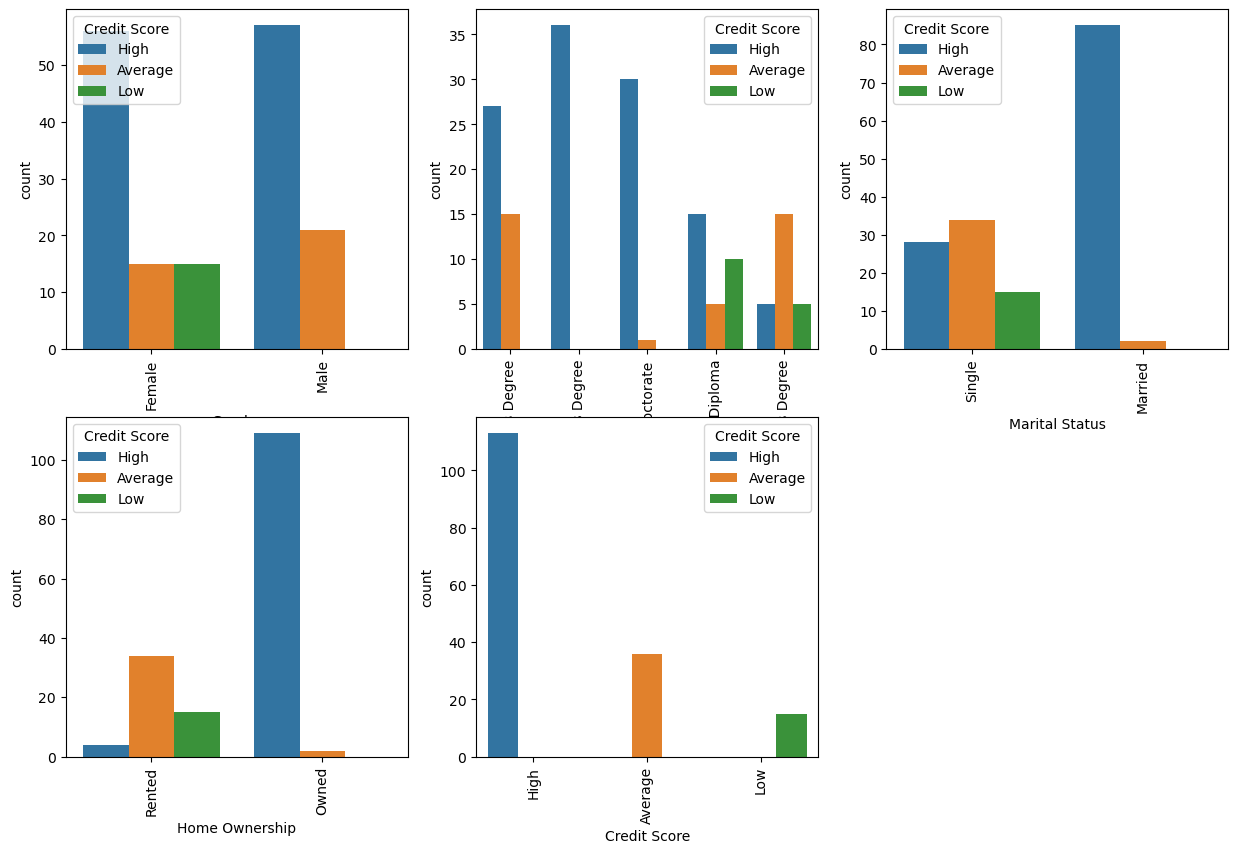

In [10]:
# Plot categorical variable
categorical_data=['Gender','Education','Marital Status','Home Ownership','Credit Score']

plt.figure(figsize=(15,15),facecolor='white')
plotno = 1 ## counter

for column in categorical_data:
    if plotno<=20: ## acessing the column
        plt.subplot(3,3,plotno) 
        sns.countplot(x=data[column],hue='Credit Score',data=data)
        plt.xticks(rotation=90)
        plotno+=1 ## counter increment
# show plot
plt.show()

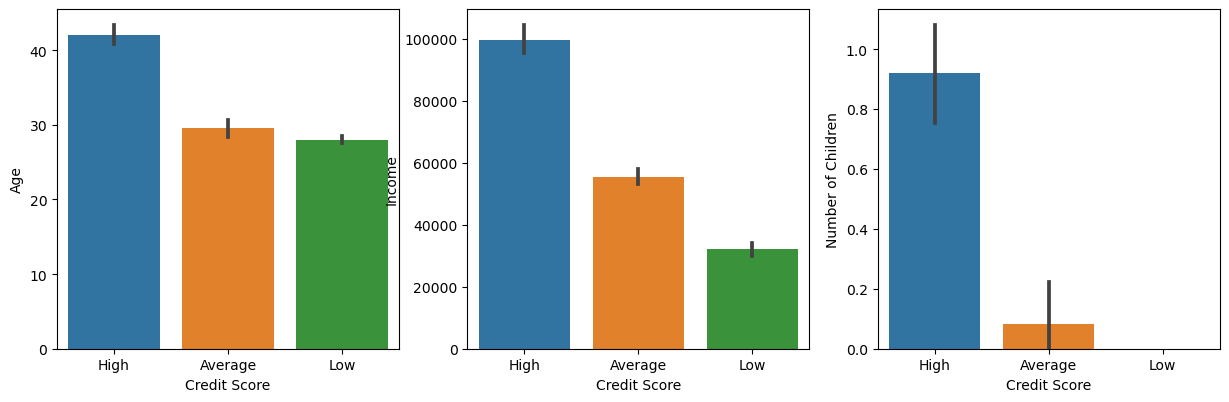

In [11]:
# Plot numerical features
numerical_data=['Age','Income','Number of Children']

plt.figure(figsize=(15,15),facecolor='white')
plotno = 1 ## counter

for column in numerical_data:
    if plotno<=20: ## acessing the column
        plt.subplot(3,3,plotno) 
        sns.barplot(x='Credit Score',y=data[column],data=data)
        plotno+=1 ## counter increment
# show plot
plt.show()

## Data Preprocessing

In [12]:
# Check missing values in data
data.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

* No missing values present in data.

In [13]:
# Counts of gender
data.Gender.value_counts()

Female    86
Male      78
Name: Gender, dtype: int64

In [14]:
data.Gender=data.Gender.map({'Female':1,'Male':0})

In [15]:
data.Gender.value_counts()

1    86
0    78
Name: Gender, dtype: int64

In [16]:
data['Marital Status'].value_counts()

Married    87
Single     77
Name: Marital Status, dtype: int64

In [17]:
data['Marital Status']=data['Marital Status'].map({'Married':1,'Single':0})

In [18]:
data['Marital Status'].value_counts()

1    87
0    77
Name: Marital Status, dtype: int64

In [19]:
data.Education.value_counts()

Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: Education, dtype: int64

In [20]:
# Label Encoding Technique
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [21]:
data.Education = lb.fit_transform(data.Education)

In [22]:
data.Education.value_counts()

1    42
4    36
2    31
3    30
0    25
Name: Education, dtype: int64

In [23]:
data['Home Ownership']=lb.fit_transform(data['Home Ownership'])

In [24]:
data['Home Ownership'].value_counts()

0    111
1     53
Name: Home Ownership, dtype: int64

In [25]:
data['Credit Score'].value_counts()

High       113
Average     36
Low         15
Name: Credit Score, dtype: int64

In [26]:
data['Credit Score']=data['Credit Score'].map({'High':2,'Average':1,'Low':0})

In [27]:
data['Credit Score'].value_counts()

2    113
1     36
0     15
Name: Credit Score, dtype: int64

In [28]:
# After data-preprocessing
data.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,1,50000,1,0,0,1,2
1,30,0,100000,4,1,2,0,2
2,35,1,75000,2,1,1,0,2
3,40,0,125000,3,0,0,0,2
4,45,1,100000,1,1,3,0,2


## Feature Selection

In [29]:
# Check redundant features
data.describe()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,37.975610,0.524390,83765.243902,2.060976,0.530488,0.652439,0.323171,1.597561
std,8.477289,0.500934,32457.306728,1.391010,0.500598,0.883346,0.469120,0.652692
min,25.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.750000,0.000000,57500.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,1.000000,83750.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,45.000000,1.000000,105000.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,53.000000,1.000000,162500.000000,4.000000,1.000000,3.000000,1.000000,2.000000


<AxesSubplot:>

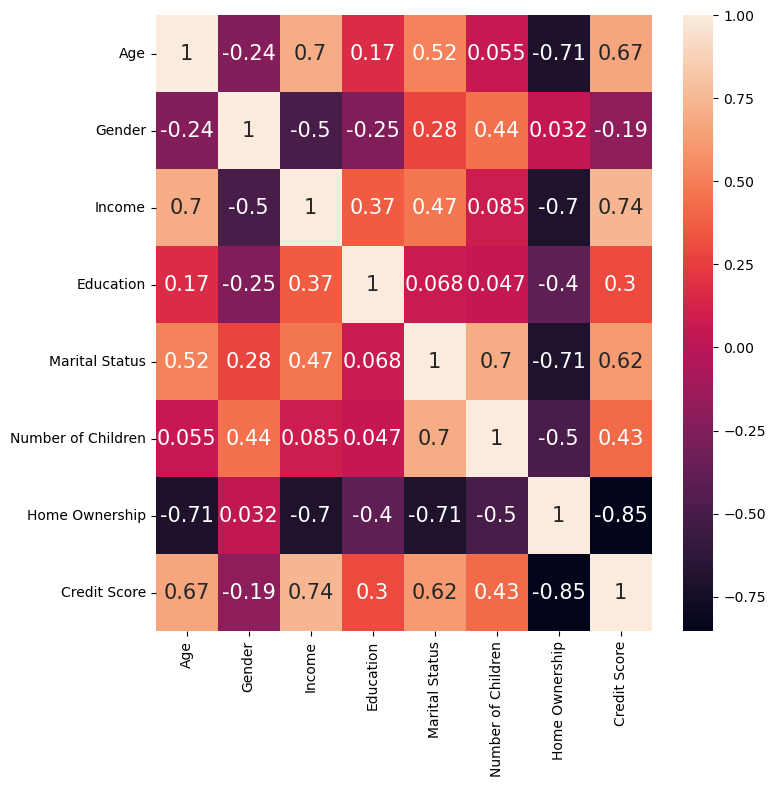

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':15})

## Model Creation

In [31]:
# Defining dependent & independent variables
x = data.drop('Credit Score',axis=1)
y = data['Credit Score']

In [32]:
# Creating training & testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (131, 7)
x_test shape: (33, 7)
y_train shape: (131,)
y_test shape: (33,)


## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_dt_predict = dt.predict(x_test)

In [36]:
from sklearn.metrics import classification_report,accuracy_score

In [37]:
print("Accuracy Score :",accuracy_score(y_test,y_dt_predict))

Accuracy Score: 0.9696969696969697


In [38]:
print(classification_report(y_test,y_dt_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.96      0.98        23

    accuracy                           0.97        33
   macro avg       0.94      0.99      0.96        33
weighted avg       0.97      0.97      0.97        33



In [39]:
pd.crosstab(y_test,y_dt_predict)

col_0,0,1,2
Credit Score,,,
0,5,0,0
1,0,5,0
2,0,1,22


## Logestic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_lr_predict=lr.predict(x_test)

In [42]:
print("Accuracy Score:",accuracy_score(y_test,y_lr_predict))

Accuracy Score: 0.9393939393939394


In [43]:
print(classification_report(y_test,y_lr_predict))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.80      0.89         5
           2       0.92      1.00      0.96        23

    accuracy                           0.94        33
   macro avg       0.97      0.87      0.91        33
weighted avg       0.94      0.94      0.94        33



In [44]:
pd.crosstab(y_test,y_lr_predict)

col_0,0,1,2
Credit Score,,,
0,4,0,1
1,0,4,1
2,0,0,23


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_rf_predict=rf.predict(x_test)

In [47]:
print("Accuracy Score:",accuracy_score(y_test,y_rf_predict))

Accuracy Score: 0.9696969696969697


In [48]:
print(classification_report(y_test,y_rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.96      1.00      0.98        23

    accuracy                           0.97        33
   macro avg       0.99      0.93      0.96        33
weighted avg       0.97      0.97      0.97        33



In [49]:
pd.crosstab(y_test,y_rf_predict)

col_0,0,1,2
Credit Score,,,
0,5,0,0
1,0,4,1
2,0,0,23


## Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [52]:
y_bc_predict=bc.predict(x_test)

In [54]:
print("Accuracy Score:",accuracy_score(y_test,y_bc_predict))

Accuracy Score: 0.9696969696969697


In [53]:
print(classification_report(y_test,y_bc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.96      0.98        23

    accuracy                           0.97        33
   macro avg       0.94      0.99      0.96        33
weighted avg       0.97      0.97      0.97        33



## XGBoosting

In [62]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [63]:
y_xgb_predict=xgb.predict(x_test)

In [64]:
print("Accuracy Score:",accuracy_score(y_test,y_xgb_predict))

Accuracy Score: 1.0


In [65]:
print(classification_report(y_test,y_xgb_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        23

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [71]:
data=[{"Model":['Decision Tree':'accuracy_score','Logestic Regression Model':'accuracy_score','Random Forest':'accuracy_score','Bagging':'accuracy_score','XGBoosting':'accuracy_score']}]
df = pd.DataFrame.from_dict(data)
df

SyntaxError: invalid syntax (3402990212.py, line 1)

In [75]:
data = [{'Model': 'Decision Tree', 'Accuracy Score': accuracy_score(y_test,y_dt_predict)},
         {'Model': 'Logestic Regression Model', 'Accuracy Score': accuracy_score(y_test,y_lr_predict)},
         {'Model': 'Random Forest', 'Accuracy Score': accuracy_score(y_test,y_rf_predict)},
         {'Model': 'Bagging', 'Accuracy Score': accuracy_score(y_test,y_bc_predict)},
         {'Model': 'XGBoosting', 'Accuracy Score': accuracy_score(y_test,y_xgb_predict)}]
  
df = pd.DataFrame.from_dict(data)
  
df


,Model,Accuracy Score
0,Decision Tree,0.969697
1,Logestic Regression Model,0.939394
2,Random Forest,0.969697
3,Bagging,0.969697
4,XGBoosting,1.000000
